In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-fitting-tempfit)

Here are the 5-year temperature averages again.

In [2]:
year = 1955:5:2000
t = @. (year - 1950) / 10
temp = [ -0.0480, -0.0180, -0.0360, -0.0120, -0.0040,
          0.1180, 0.2100, 0.3320, 0.3340, 0.4560 ]

10-element Vector{Float64}:
 -0.048
 -0.018
 -0.036
 -0.012
 -0.004
  0.118
  0.21
  0.332
  0.334
  0.456

```{index} Julia; \\
```

The standard best-fit line results from using a linear polynomial that meets the least-squares criterion.
```{tip}
:class: dropdown
Backslash solves overdetermined linear systems in a least-squares sense.
```

In [3]:
using Polynomials
V = [ t.^0 t ]    # Vandermonde-ish matrix
@show size(V)
c = V \ temp
p = Polynomial(c)

size(V) = (10, 2)

Polynomial(-0.18773333333333356 + 0.11670303030303034*x)

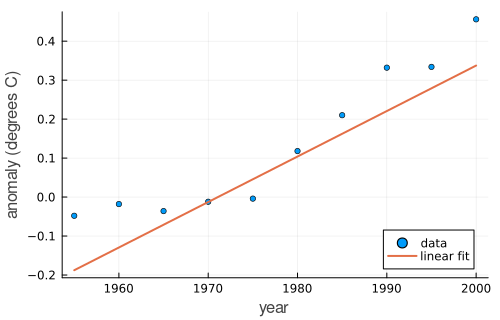

In [4]:
f = yr -> p((yr - 1955) / 10)
scatter(year, temp, label="data",
    xlabel="year", ylabel="anomaly (degrees C)", leg=:bottomright)
plot!(f, 1955, 2000, label="linear fit")

If we use a global cubic polynomial, the points are fit more closely.

In [5]:
V = [ t[i]^j for i in 1:length(t), j in 0:3 ]   
@show size(V);

size(V) = (10, 4)


Now we solve the new least-squares problem to redefine the fitting polynomial.
```{tip}
:class: dropdown
The definition of `f` above is in terms of `p`. When `p` is changed, then `f` calls the new version.
```

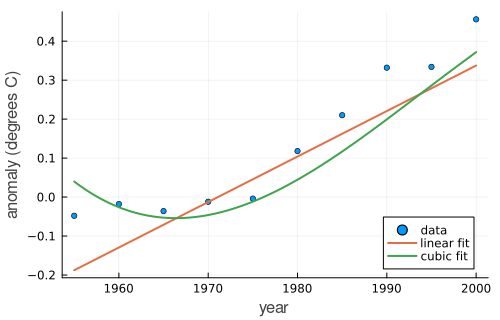

In [6]:
p = Polynomial( V \ temp )
plot!(f, 1955, 2000, label="cubic fit")

If we were to continue increasing the degree of the polynomial, the residual at the data points would get smaller, but overfitting would increase.